# Interactias Network

One way of examining the impact of invasive species is to look at all their interactions and the interations those organisms have with each other. This full interaction network gives you a good idea whether a species might be a "keystone" species 

*"The concept of the "keystone species" is redefined to allow for the a priori prediction of these species within ecosystems. A keystone species is held to be a **strongly interacting species** whose top-down effect on species diversity and competition is large relative to its biomass dominance within a functional group."*

Davic, R. D. (2003). Linking keystone species and functional groups: a new operational definition of the keystone species concept. Conservation Ecology, 7(1).

I will harvest species interactions data from GLOBI (https://www.globalbioticinteractions.org/) to discover the species that interact with an invasive species. I will then harvest all the interactions for those species to create two tiers of interactions. I will then create a network diagram to visualize this.

This notebook takes considerable insperation and code from Yikang Li's project on GLoBI (https://curiositydata.org/part1_globi_access/).

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Load the GLoBI data

The current snapshot of GLoBI was taken on 2019-11-05 from https://depot.globalbioticinteractions.org/snapshot/target/data/tsv/interactions.tsv.gz


In [3]:
# This takes a few minutes to load in.
# the low_memory=False property will get rid of a warning, but will not help if there is really no memory left
data = pd.read_csv('C://Users//quentin//Documents//interactias//interactias//data//interactions.tsv', delimiter='\t', encoding='utf-8', low_memory=False)
len(data)

3878740

In [4]:
# Take a little look at the data to make sure it makes sense
data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
1,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
2,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
3,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
4,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z


## Drop duplicates

This line gets rid of duplicate interations. I currently can't see a reason to keep them, but this perhaps should be checked. 
Some more common interactions might have more support in the literature and therefore more records. Deduplicating them tends to equal out rare interactions with common ones.

In [5]:
data.drop_duplicates(['sourceTaxonName', 'interactionTypeName', 'targetTaxonName'], inplace = True)

In [6]:
## Check how many rows are left
len(data)

1103723

## Remove ranks that are not species
Many entries in GLoBI are non-specific interations at a high taxonomic level. For example, roses are visited by bees.
I have chossen to remove these interactions from the study, at least preliminarly

In [7]:
data.drop(data[data['sourceTaxonRank'] != 'species'].index, inplace = True)
data.drop(data[data['targetTaxonRank'] != 'species'].index, inplace = True)

In [8]:
## Check how many rows are left
len(data)

536018

## Remove "interactsWith"
There are many vague interactions with the term interactsWith. These aren't really that useful, because it could be any kind of interaction, positive or negative, direct or indirect.

In [9]:
data = data[data.interactionTypeName != 'interactsWith']

len(data)

394573

Define the key taxon for the notebook for which to find all interactions


In [10]:
taxon = "Oxalis corniculata"
#taxon = "Oxalis pes-caprae"
#taxon = "Lantana camara"
#taxon = "Cirsium vulgare"
#taxon = "Procyon lotor" # raccoon
#taxon = "Sciurus carolinensis" # Eastern grey squirrel

In [11]:
# What are all the types of interactions involving Oxalis pes-caprae as source taxon?
data[data['sourceTaxonName'] == taxon]['interactionTypeName'].unique()

array([], dtype=object)

In [12]:
# What are all the types of interactions involving Oxalis pes-caprae as target taxon?
data[data['targetTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'visitsFlowersOf', 'hasHost', 'mutualistOf',
       'pathogenOf', 'pollinates'], dtype=object)

How many taxon sources do I have?

In [13]:
len(data[data['sourceTaxonName'] == taxon])

0

How many taxon targets do I have?

In [14]:
len(data[data['targetTaxonName'] == taxon])

48

Gather together all the data where the target is the taxon in question.

In [15]:
# What are the columns of this dataset?
data.columns

Index(['sourceTaxonId', 'sourceTaxonIds', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonPathIds',
       'sourceTaxonPathRankNames', 'sourceTaxonSpeciesName',
       'sourceTaxonSpeciesId', 'sourceTaxonGenusName', 'sourceTaxonGenusId',
       'sourceTaxonFamilyName', 'sourceTaxonFamilyId', 'sourceTaxonOrderName',
       'sourceTaxonOrderId', 'sourceTaxonClassName', 'sourceTaxonClassId',
       'sourceTaxonPhylumName', 'sourceTaxonPhylumId',
       'sourceTaxonKingdomName', 'sourceTaxonKingdomId', 'sourceId',
       'sourceOccurrenceId', 'sourceCatalogNumber', 'sourceBasisOfRecordId',
       'sourceBasisOfRecordName', 'sourceLifeStageId', 'sourceLifeStageName',
       'sourceBodyPartId', 'sourceBodyPartName', 'sourcePhysiologicalStateId',
       'sourcePhysiologicalStateName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonIds',
       'targetTaxonName', 'targetTaxonRank', 'targetTaxonPathNames',
       'targetTaxonPath

## Simplify the table to make it readable

## Get the primary interation data for the species in question

In [16]:
    interactDataTaxon = data[data['targetTaxonName'] == taxon]
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == taxon])

## Get a list of all the primary interacting species

In [17]:
interactingTaxa = interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique()

## Get all the secondary interactions

In [18]:
for name in interactingTaxa:
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == name])

In [49]:
    cleanInteractDataTaxon = interactDataTaxon[['sourceTaxonId', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonFamilyName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonRank',
       'targetTaxonName','targetTaxonPathNames',
       'targetTaxonPathIds', 'targetTaxonPathRankNames',
       'targetTaxonSpeciesName', 'targetTaxonSpeciesId',
       'targetTaxonGenusName', 'targetTaxonGenusId', 'targetTaxonFamilyName',
       'targetTaxonFamilyId', 'targetTaxonOrderName', 'targetTaxonOrderId',
       'targetTaxonClassName', 'targetTaxonClassId', 'targetTaxonPhylumName',
       'targetTaxonPhylumId', 'targetTaxonKingdomName', 'targetTaxonKingdomId', 'referenceDoi', 'decimalLatitude', 'decimalLongitude'
        ]].dropna(subset=['targetTaxonId', 'targetTaxonName','targetTaxonPathNames','targetTaxonPathIds'])

In [50]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonFamilyName,interactionTypeName,interactionTypeId,targetTaxonId,targetTaxonRank,targetTaxonName,...,targetTaxonOrderId,targetTaxonClassName,targetTaxonClassId,targetTaxonPhylumName,targetTaxonPhylumId,targetTaxonKingdomName,targetTaxonKingdomId,referenceDoi,decimalLatitude,decimalLongitude
193783,EOL:1048468,Anas aucklandica,species,Anas aucklandica,NaN,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:29067,species,Oxalis corniculata,...,ITIS:846628,Magnoliopsida,ITIS:18063,Tracheophyta,ITIS:846496,Plantae,ITIS:202422,NaN,NaN,NaN
212212,EOL_V2:1049189,Callipepla californica,species,Animalia | Chordata | Aves | Galliformes | Odo...,Odontophoridae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:29067,species,Oxalis corniculata,...,ITIS:846628,Magnoliopsida,ITIS:18063,Tracheophyta,ITIS:846496,Plantae,ITIS:202422,NaN,NaN,NaN
212652,GBIF:7341600,Melozone crissalis,species,Animalia | Chordata | Aves | Passeriformes | E...,Emberizidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:29067,species,Oxalis corniculata,...,ITIS:846628,Magnoliopsida,ITIS:18063,Tracheophyta,ITIS:846496,Plantae,ITIS:202422,NaN,NaN,NaN
213107,ITIS:997805,Haemorhous mexicanus,species,Animalia | Bilateria | Deuterostomia | Chordat...,Fringillidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:29067,species,Oxalis corniculata,...,ITIS:846628,Magnoliopsida,ITIS:18063,Tracheophyta,ITIS:846496,Plantae,ITIS:202422,NaN,NaN,NaN
1131090,GBIF:2514966,Puccinia sorghi,species,Fungi | Basidiomycota | Pucciniomycetes | Pucc...,Pucciniaceae,parasiteOf,http://purl.obolibrary.org/obo/RO_0002444,GBIF:8427624,species,Oxalis corniculata,...,GBIF:7224021,Magnoliopsida,GBIF:220,Tracheophyta,GBIF:7707728,Plantae,GBIF:6,NaN,NaN,NaN


In [51]:
# How many different sort of interaction do I have left?
# Checking out all the interaction types
cleanInteractDataTaxon['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'mutualistOf', 'pathogenOf', 'pollinates',
       'visitsFlowersOf', 'hasHost'], dtype=object)

In [52]:
cleanInteractDataTaxon.groupby(cleanInteractDataTaxon['interactionTypeName']).size().sort_values(ascending = False)

interactionTypeName
pollinates         540
mutualistOf        353
eats               289
visitsFlowersOf    149
hasHost             17
parasiteOf           8
pathogenOf           6
dtype: int64

In [53]:
len(cleanInteractDataTaxon)

1362

In [54]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonFamilyName,interactionTypeName,interactionTypeId,targetTaxonId,targetTaxonRank,targetTaxonName,...,targetTaxonOrderId,targetTaxonClassName,targetTaxonClassId,targetTaxonPhylumName,targetTaxonPhylumId,targetTaxonKingdomName,targetTaxonKingdomId,referenceDoi,decimalLatitude,decimalLongitude
193783,EOL:1048468,Anas aucklandica,species,Anas aucklandica,NaN,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:29067,species,Oxalis corniculata,...,ITIS:846628,Magnoliopsida,ITIS:18063,Tracheophyta,ITIS:846496,Plantae,ITIS:202422,NaN,NaN,NaN
212212,EOL_V2:1049189,Callipepla californica,species,Animalia | Chordata | Aves | Galliformes | Odo...,Odontophoridae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:29067,species,Oxalis corniculata,...,ITIS:846628,Magnoliopsida,ITIS:18063,Tracheophyta,ITIS:846496,Plantae,ITIS:202422,NaN,NaN,NaN
212652,GBIF:7341600,Melozone crissalis,species,Animalia | Chordata | Aves | Passeriformes | E...,Emberizidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:29067,species,Oxalis corniculata,...,ITIS:846628,Magnoliopsida,ITIS:18063,Tracheophyta,ITIS:846496,Plantae,ITIS:202422,NaN,NaN,NaN
213107,ITIS:997805,Haemorhous mexicanus,species,Animalia | Bilateria | Deuterostomia | Chordat...,Fringillidae,eats,http://purl.obolibrary.org/obo/RO_0002470,ITIS:29067,species,Oxalis corniculata,...,ITIS:846628,Magnoliopsida,ITIS:18063,Tracheophyta,ITIS:846496,Plantae,ITIS:202422,NaN,NaN,NaN
1131090,GBIF:2514966,Puccinia sorghi,species,Fungi | Basidiomycota | Pucciniomycetes | Pucc...,Pucciniaceae,parasiteOf,http://purl.obolibrary.org/obo/RO_0002444,GBIF:8427624,species,Oxalis corniculata,...,GBIF:7224021,Magnoliopsida,GBIF:220,Tracheophyta,GBIF:7707728,Plantae,GBIF:6,NaN,NaN,NaN


# Drawing a network of the interactions

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

In [56]:
# Create graphic object
G = nx.DiGraph()

# Match colours to interactions to distinguish them on the graph
colorInteractions = {'interaction':['pollinates', 'mutualistOf', 'eats', 'visitsFlowersOf', 'hasHost', 'parasiteOf', 'pathogenOf'],
        'colour':['r', 'g', 'b', 'y', 'm', 'w', 'c']}  

colorInteractionsDf = pd.DataFrame(colorInteractions)

In [57]:
# iterate over rows with iterrows()
for index, row in cleanInteractDataTaxon.iterrows():
     # access data using column names
     #print(row['sourceTaxonName'], row['targetTaxonName'], row['interactionTypeName'])
    G.add_node(row['sourceTaxonName'])
    G.add_node(row['targetTaxonName'], color = colorInteractionsDf[colorInteractionsDf.interaction == row['interactionTypeName']].iloc[0]['colour'])
    #print(colorInteractionsDf[colorInteractionsDf.interaction == row['interactionTypeName']].iloc[:,1])
    G.add_edge(row['targetTaxonName'], row['sourceTaxonName'], label = row['interactionTypeName'])
    

## A network of all the interacting taxa

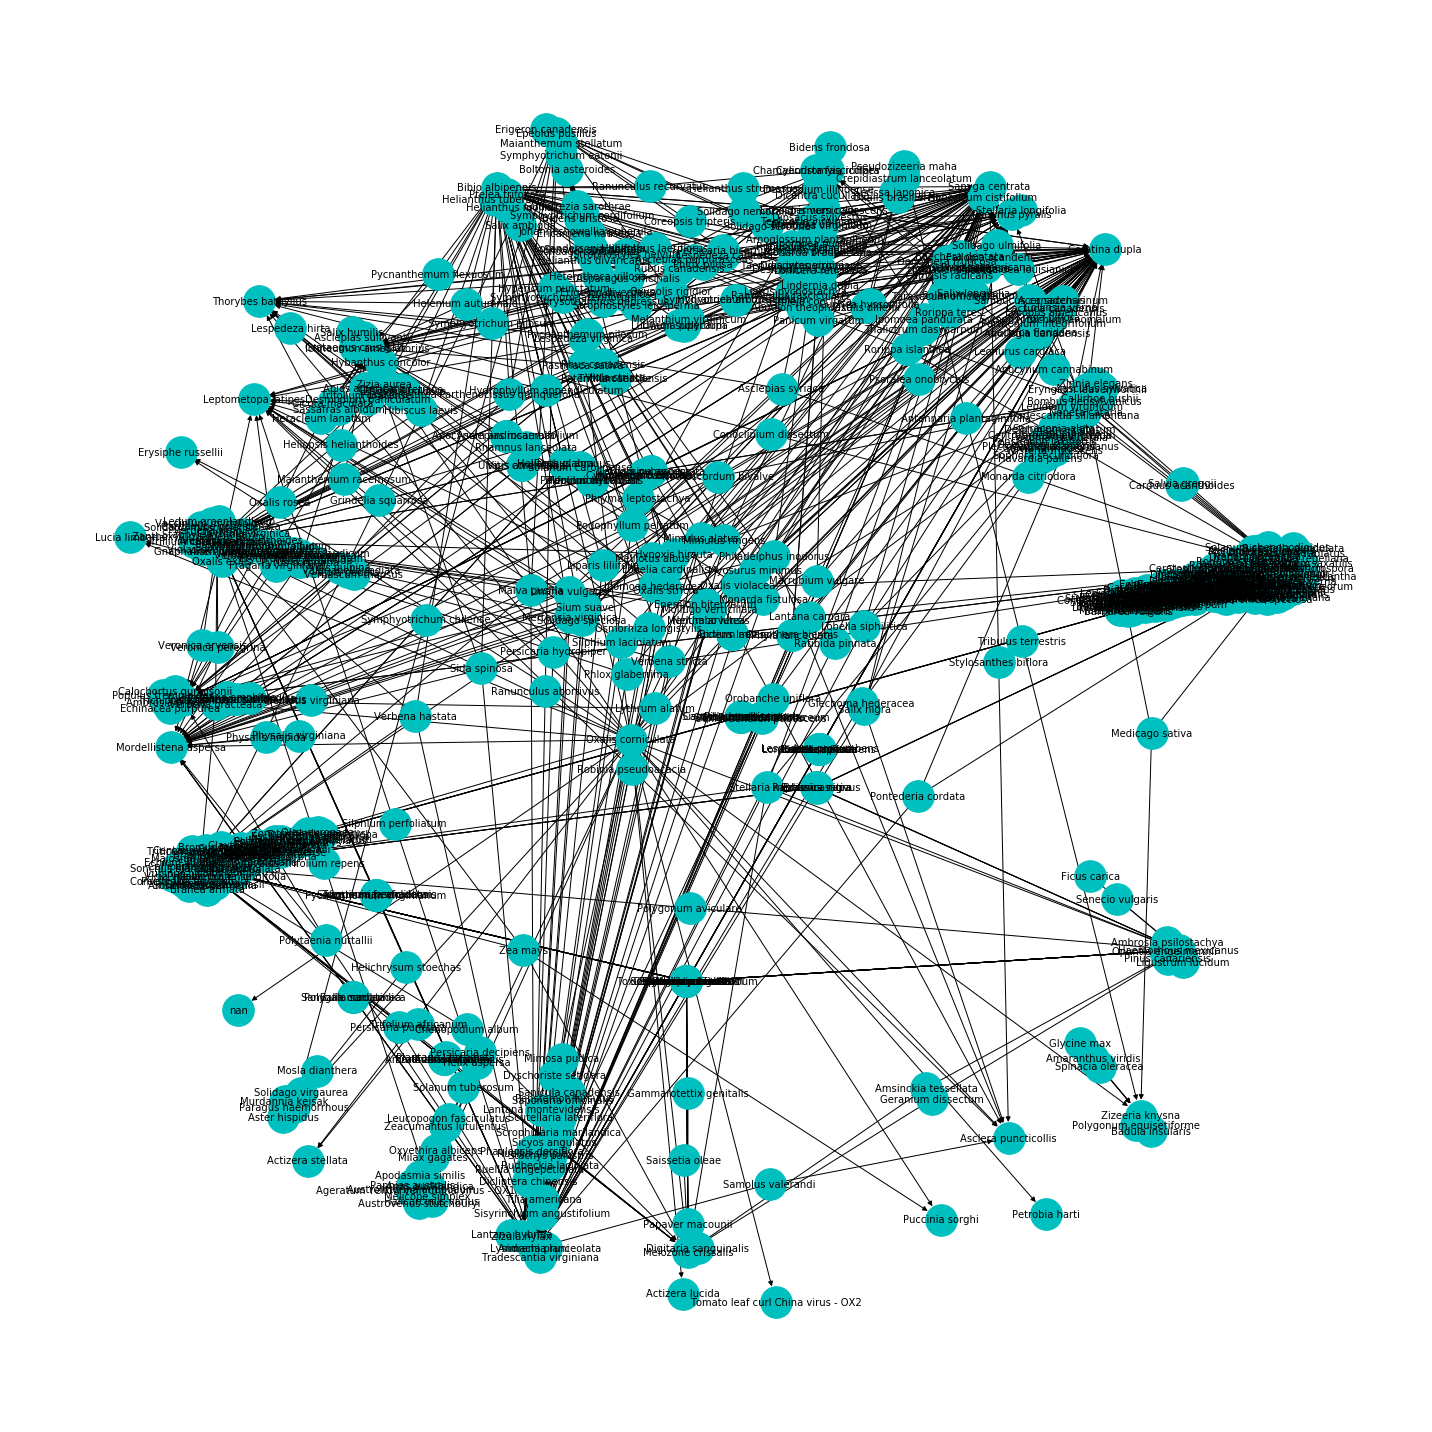

In [58]:
plt.figure(figsize=(20,20))
edge_labels = nx.get_edge_attributes(G,'label')

pos = nx.spring_layout(G) 
#pos = nx.random_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.shell_layout(G, scale=2)

#nodeColors = nx.get_node_attributes(G,'color')

#nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=10, font_color='blue')

#nx.draw_networkx_nodes(G, pos, node_color=nodeColors.values())

nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='c', alpha= 1, arrows=True, 
                    linewidths=1, font_color="black", font_size=10, style = 'dashed')

plt.axis('off')
plt.tight_layout()
plt.show()





## Create a file with all the nodes and their attributes

In [154]:
# Get the source nodes
nodes = cleanInteractDataTaxon.groupby(['sourceTaxonName','sourceTaxonFamilyName']).count()


In [155]:
# Get the target nodes
nodes = nodes.append(cleanInteractDataTaxon.groupby(['targetTaxonName','targetTaxonFamilyName']).count(),sort=True)

In [156]:

nodes = nodes[['sourceTaxonName', 'targetTaxonFamilyName']]
nodes.head()

,,sourceTaxonName,targetTaxonFamilyName
sourceTaxonName,sourceTaxonFamilyName,,
Actizera lucida,Lycaenidae,NaN,2.0
Actizera stellata,Lycaenidae,NaN,3.0
Ageratum Yellow vein China virus - OX1,Geminiviridae,NaN,2.0
Andrena carlini,Andrenidae,NaN,117.0
Andrena pruni,Andrenidae,NaN,120.0


In [157]:
# Change the source and target column names to make the file Gephi friendly
#nodes.rename(columns={'sourceTaxonName':'source','targetTaxonName':'target'}, inplace=True)
nodes.index.names = ['Label', 'Family']



In [158]:
nodes = nodes.reset_index()
nodes.head()

,Label,Family,sourceTaxonName,targetTaxonFamilyName
0,Actizera lucida,Lycaenidae,NaN,2.0
1,Actizera stellata,Lycaenidae,NaN,3.0
2,Ageratum Yellow vein China virus - OX1,Geminiviridae,NaN,2.0
3,Andrena carlini,Andrenidae,NaN,117.0
4,Andrena pruni,Andrenidae,NaN,120.0


In [159]:

nodes.index.names = ['Id']
#nodes.rename(columns={'sourceTaxonName':'Label',
#                      'sourceTaxonFamilyName':'Family'}, 
#                 inplace=True)

In [160]:
filename = taxon+"Nodes.csv"
nodes.to_csv (filename, index = True, header=True) 

## Create a file with all the edges and their attributes

In [161]:
edges = cleanInteractDataTaxon[['sourceTaxonName', 'targetTaxonName', 'interactionTypeName']]


In [162]:
# Add a column to the edges to indicate that these are disrected graphes 
#edges['Type'] = 'directed'
edges.insert(3, 'Type', 'directed')
edges.rename(columns={'sourceTaxonName':'Source',
                      'targetTaxonName':'Target', 
                      'interactionTypeName':'Interaction'},
                 inplace=True)
edges.index.names = ['Id']
edges.head()

,Source,Target,Interaction,Type
Id,,,,
193783,Anas aucklandica,Oxalis corniculata,eats,directed
212212,Callipepla californica,Oxalis corniculata,eats,directed
212652,Melozone crissalis,Oxalis corniculata,eats,directed
213107,Haemorhous mexicanus,Oxalis corniculata,eats,directed
1131090,Puccinia sorghi,Oxalis corniculata,parasiteOf,directed


In [163]:
filename = taxon+"Edges.csv"
edges.to_csv (filename, index = True, header=True) 

In [81]:
edge_labels

{('Oxalis corniculata', 'Anas aucklandica'): 'eats',
 ('Oxalis corniculata', 'Callipepla californica'): 'eats',
 ('Oxalis corniculata', 'Melozone crissalis'): 'eats',
 ('Oxalis corniculata', 'Haemorhous mexicanus'): 'eats',
 ('Oxalis corniculata', 'Puccinia sorghi'): 'parasiteOf',
 ('Oxalis corniculata', 'Erysiphe russellii'): 'parasiteOf',
 ('Oxalis corniculata', 'Zizula hylax'): 'eats',
 ('Oxalis corniculata', 'Pseudozizeeria maha'): 'eats',
 ('Oxalis corniculata', 'Lucia limbaria'): 'eats',
 ('Oxalis corniculata', 'Zizeeria knysna'): 'eats',
 ('Oxalis corniculata', 'Actizera stellata'): 'eats',
 ('Oxalis corniculata', 'Actizera lucida'): 'eats',
 ('Oxalis corniculata', 'Ichneumon ambulatorius'): 'pollinates',
 ('Oxalis corniculata', 'Bibio albipennis'): 'pollinates',
 ('Oxalis corniculata', 'Cylindromyia rufipes'): 'pollinates',
 ('Oxalis corniculata', 'Leptometopa latipes'): 'pollinates',
 ('Oxalis corniculata', 'Thorybes bathyllus'): 'pollinates',
 ('Oxalis corniculata', 'Epeolus 